In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from didiUtil import DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710
from predictor import XGBoostPredictor

Using TensorFlow backend.


## DIDI

## XgboostPredictor

In [5]:
xgb = XGBoostPredictor()

In [6]:
test_x, test_y = xgb.get_train_vec([DIDI201705])

100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


In [7]:
train_x, train_y = xgb.get_train_vec([DIDI201706])

100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


In [ ]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

In [9]:
predict_y = predictor.predict(test_x)

In [10]:
len(predict_y), len(test_y)

(744, 744)

### 使用seaborn画图需要将数据合成df

In [11]:
date_index = pd.date_range(start='2018-11-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

## 实验结果展示

In [12]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

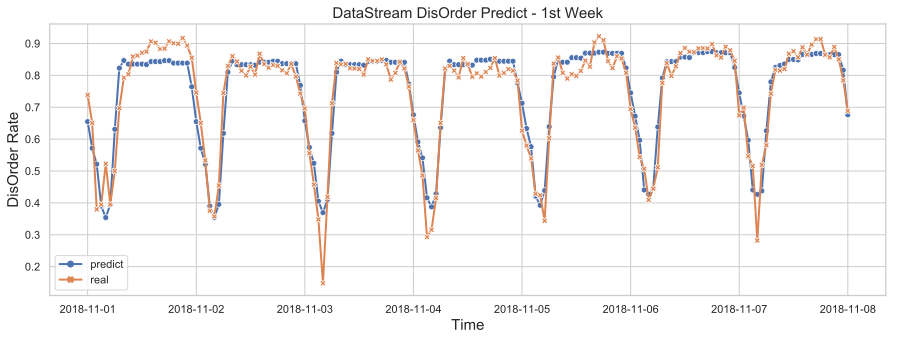

In [13]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 5))
# 设置图名称
ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[:169])

## 封装成一个画图类

In [ ]:
from didiDraw import DrawXgboost
draw = DrawXgboost()
test_y, predict_y = draw.get_predict_result([DIDI201705], [DIDI201706])

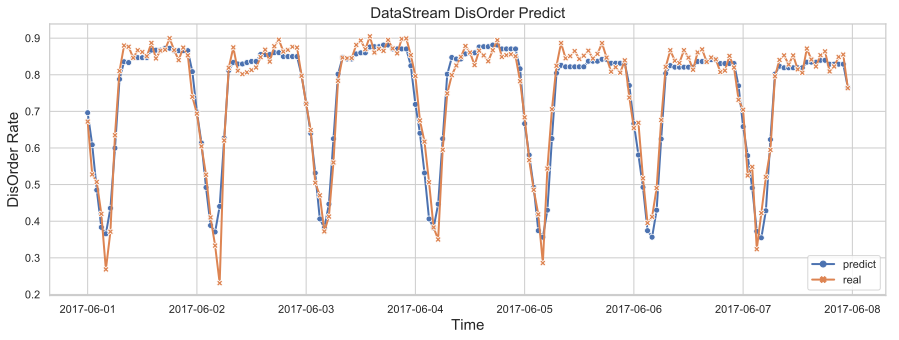

In [19]:
draw.draw_real_predict(
    week_num=1,
    start_time="2017-06-01 00:00:00",
    title="DataStream DisOrder Predict",
    figsize=(15,5)
)

## 回归性能指标

In [20]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [5]:
from didiMetric import get_xgb_metrics

In [6]:
months = [DIDI201705, DIDI201706, DIDI201707, DIDI201708, DIDI201709, DIDI201710]

In [ ]:
update_metrics = get_xgb_metrics(months, True)
unupdate_metrics = get_xgb_metrics(months, False)
result = pd.concat([update_metrics,unupdate_metrics], axis=1)
result.columns = [["Update Model","Update Model","Update Model","UnUpdate Model","UnUpdate Model","UnUpdate Model"],["RMSE", "MAE", "R2S","RMSE", "MAE", "R2S"]]

In [8]:
result

Update Model                     UnUpdate Model                    
                   RMSE       MAE       R2S           RMSE       MAE       R2S
2018-09-01     0.041500  0.022499  0.934274       0.041500  0.022499  0.934274
2018-10-01     0.038596  0.022682  0.940950       0.044998  0.028651  0.919734
2018-11-01     0.037803  0.018452  0.943478       0.051672  0.035045  0.894398
2018-12-01     0.042673  0.022607  0.925134       0.052242  0.031584  0.887796
2019-01-01     0.048008  0.023855  0.893191       0.065367  0.035935  0.801986